#**Project 2 : Stock Data**

----

1. Ask user for start date and end date between that period calculate. 12-period EMA and 26-period EMA are two moving averages. Calculate them and plot These two with Close price in a line chart

2. Ask user for start date and end date between that period calculate. 12-period SMA and 26-period SMA are two moving averages. Calculate them and plot These two with Close price in a line chart

   a.  compare SMA 12 EMA 12 and CLOSE

   b. compare SMA 26 EMA 26 and CLOSE

3.  Calculate MACD between EMA 26 and EMA 12 Plot line chart showing EMA 26 and EMA 12 and MACD

4. Calculate RSI, Bollinger bands and ADX using the notebook for our own data.

5. Create a subplot with all indicators.

----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/content/Stock_data.csv'

In [3]:
df_raw = pd.read_csv(path)
df_raw.shape

(12890, 6)

In [4]:
df_raw.head(5)

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.23492,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.23521,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.23435,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.23491,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.23680,1.238700,1.236285,1.238205


In [5]:
df_raw.dtypes

Gmt time     object
Volume      float64
Open        float64
High        float64
Low         float64
Close       float64
dtype: object

In [6]:
df_raw.isna().sum()

Gmt time    0
Volume      0
Open        0
High        0
Low         0
Close       0
dtype: int64

#**Data Cleaning and Preprocessing**

                      --Pending--

In [7]:
df_final = df_raw

In [8]:
# Convert GMT time column to date and time format

df_final['Gmt time'] = pd.to_datetime(df_final['Gmt time'], format ='%d.%m.%Y %H:%M:%S.%f')

#**User-Input: Taking Start Date and End Date**

In [9]:
# Take the input from the user

#start_date = input("Enter the start date in the format:[YYYY-MM-DD]: ")
#end_date = input("Enter the end date in the format:[YYYY-MM-DD]")

# HARDCODED : FOR TESTING ONLYface

start_date = '2013-10-10'
end_date = '2014-10-10'

In [10]:
df_final

,Gmt time,Volume,Open,High,Low,Close
0,2012-12-12 00:00:00,11011.3902,1.234920,1.235890,1.233830,1.235200
1,2012-12-12 04:00:00,13271.5599,1.235210,1.235510,1.233860,1.234340
2,2012-12-12 08:00:00,26716.2305,1.234350,1.236370,1.233305,1.234905
3,2012-12-12 12:00:00,28430.1602,1.234910,1.237285,1.234850,1.236810
4,2012-12-12 16:00:00,33124.1904,1.236800,1.238700,1.236285,1.238205
...,...,...,...,...,...,...
12885,2020-12-11 04:00:00,19540.2200,1.607955,1.608915,1.604095,1.605455
12886,2020-12-11 08:00:00,48969.4700,1.605465,1.611820,1.605225,1.609935
12887,2020-12-11 12:00:00,49848.5000,1.609930,1.611365,1.606575,1.606745
12888,2020-12-11 16:00:00,23094.5300,1.606720,1.609540,1.605880,1.607315


In [11]:
df = df_final[(df_final['Gmt time'] >= start_date) & (df_final['Gmt time'] <= end_date)]

df                    # -> Calculate EMA for this DATAFRAME only that contains the rows specific to user input

# Reset the index -> Indexing for loop is difficult without this.
first_index = df.index[0]
df.reset_index(drop = True, inplace = True)

#**Calculating EMA_12 and EMA_26 and adding to the dataframe:**

In [12]:
# Using panda library

df['EMA12'] = df['Close'].ewm(span=12).mean()
df['EMA26'] = df['Close'].ewm(span=26).mean()


<ipython-input-12-93a9466176eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA12'] = df['Close'].ewm(span=12).mean()
<ipython-input-12-93a9466176eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA26'] = df['Close'].ewm(span=26).mean()


In [13]:
# # Initializing the two empty columns ['EMA_12', 'EMA_26']

# df.loc[0,'EMA_12'] = 0
# df.loc[0, 'EMA_26'] =  0
# df

In [14]:
# # Calculate 12-period EMA and adding to the df
# # multiplier_12 = (Smoothing / 1+ 12) -> Smoothing = 2

# multiplier_12 = (2/(1+12))

# for i in range(len(df)):
#   if i == 0:                                  # If its the first row
#     df.loc[i, 'EMA_12'] = df.loc[i, 'Close']  #
#   else:
#     EMA12_lastrow = df.loc[i-1, 'EMA_12']
#     value_today_12 = df.loc[i, 'Close']
#     ema_12_value = (value_today_12 * multiplier_12) + EMA12_lastrow * (1-(multiplier_12))
#     df.loc[i, 'EMA_12'] = ema_12_value
# #df

In [15]:
# # Calculate 26-period EMA
# # multiplier_26 = (Smoothing / 1+ 26) -> Smoothing = 2

# multiplier_26 = (2/(1+26))

# for i in range(len(df)):
#   if i == 0:
#     df.loc[i, 'EMA_26'] = df.loc[i, 'Close']
#   else:
#     EMA26_lastrow = df.loc[i - 1, 'EMA_26']
#     value_today_26 = df.loc[i, 'Close']
#     ema_26_value = (value_today_26 * multiplier_26) + EMA26_lastrow * (1-(multiplier_26))
#     df.loc[i, 'EMA_26'] = ema_26_value
# #df

In [16]:
df

,Gmt time,Volume,Open,High,Low,Close,EMA12,EMA26
0,2013-10-10 00:00:00,25147.1704,1.430685,1.436550,1.427170,1.434585,1.434585,1.434585
1,2013-10-10 04:00:00,21117.4298,1.434590,1.436930,1.431630,1.431785,1.433068,1.433131
2,2013-10-10 08:00:00,23338.8906,1.431805,1.435245,1.431505,1.434675,1.433695,1.433686
3,2013-10-10 12:00:00,36718.4101,1.434680,1.435950,1.428660,1.429970,1.432519,1.432647
4,2013-10-10 16:00:00,17603.4700,1.429975,1.431300,1.428675,1.428905,1.431537,1.431779
...,...,...,...,...,...,...,...,...
1606,2014-10-09 08:00:00,30950.5097,1.437830,1.440445,1.436270,1.440345,1.439885,1.440442
1607,2014-10-09 12:00:00,44280.2803,1.440355,1.446465,1.437725,1.444960,1.440666,1.440777
1608,2014-10-09 16:00:00,27649.6998,1.444995,1.447095,1.443415,1.445425,1.441398,1.441121
1609,2014-10-09 20:00:00,12899.9899,1.445420,1.448810,1.444330,1.447760,1.442377,1.441613


----
#**Data Visualization: Representing data in the Line Chart**

----

In [17]:
# import seaborn as sns

# sns.set(style="dark")

# plt.figure(figsize=(12, 6))

# sns.lineplot(x='Gmt time', y='EMA_12', data=df, label='EMA_12', color='blue')
# sns.lineplot(x='Gmt time', y='EMA_26', data=df, label='EMA_26', color='red')

# sns.lineplot(x='Gmt time', y='Close', data=df, label='Close Price', color='cyan')

# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.title('EMA_12, EMA_26 & Close Price')

# plt.legend()
# plt.grid()
# plt.show()


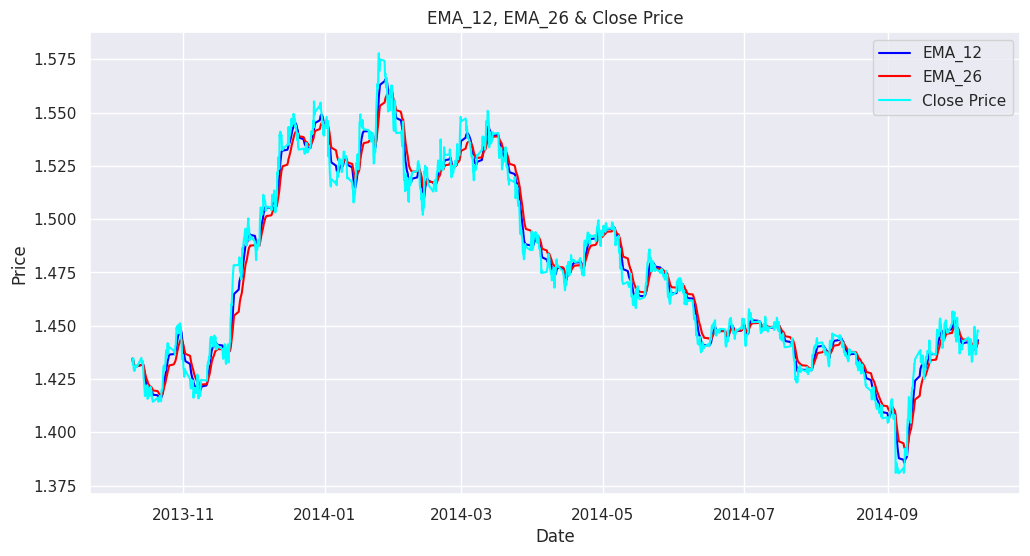

In [18]:
import seaborn as sns

sns.set(style="dark")

plt.figure(figsize=(12, 6))

sns.lineplot(x='Gmt time', y='EMA12', data=df, label='EMA_12', color='blue')
sns.lineplot(x='Gmt time', y='EMA26', data=df, label='EMA_26', color='red')

sns.lineplot(x='Gmt time', y='Close', data=df, label='Close Price', color='cyan')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('EMA_12, EMA_26 & Close Price')

plt.legend()
plt.grid()
plt.show()


----
#**QUESTION 2: SMA12 & SMA26**
----

In [19]:
# Calculating SMA12 and SMA26 and adding them to the dataframe

df['SMA12'] = df['Close'].rolling(12).mean()
df['SMA26'] = df['Close'].rolling(26).mean()

<ipython-input-19-e408abb09723>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMA12'] = df['Close'].rolling(12).mean()
<ipython-input-19-e408abb09723>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMA26'] = df['Close'].rolling(26).mean()


**Solving for the first 11 and 25 rows that are going to have 0.**

**For the first 12 and 26 values that will not have the enough data to calculate average,
we will use the original data to calculate the averages.**

In [20]:
# Approach:
# Extract the data for last 11(SMA_12) and last 25(SMA_26)  from the original data frame and calculate averages.

# df_final -> Original before user's input date df is created
# Find out the original index of the start date -> first_index : calculated before resetting index

print(first_index)

close_values_12 = []
for i in range(first_index, first_index-11, -1):
  temp = df_final.loc[i,'Close']
  close_values_12.append(temp)

print(close_values_12)

close_values_26 = []
for i in range(first_index, first_index-25, -1):
  temp2 = df_final.loc[i,'Close']
  close_values_26.append(temp2)

print(close_values_26)

### Find average of last values and put them in the dataframe ###

for j in range(0,11):
  if j == 0:
    df.loc[j,'SMA12'] = 0         # first row put 0
  else:
    subset = close_values_12[:j]
    mean = sum(subset) / len(subset)    # other rows, calculate the average of whatever we have
    df.loc[j, 'SMA12'] = mean           # put them in the dataframe
    #print(mean)

for k in range(0,25):           # Same with SMA_26
  if k == 0:
    df.loc[k,'SMA26'] = 0
  else:
    subset2 = close_values_26[:k]
    mean2 = sum(subset2) / len(subset2)
    df.loc[k, 'SMA26'] = mean2
    #print(mean2)


1335
[1.434585, 1.43072, 1.431615, 1.43253, 1.42881, 1.43315, 1.43812, 1.43901, 1.439085, 1.437415, 1.431875]
[1.434585, 1.43072, 1.431615, 1.43253, 1.42881, 1.43315, 1.43812, 1.43901, 1.439085, 1.437415, 1.431875, 1.43654, 1.43934, 1.43985, 1.439865, 1.438125, 1.44098, 1.44447, 1.440255, 1.43721, 1.43766, 1.436725, 1.43848, 1.44138, 1.443805]


In [21]:
# Delete the first row with SMA12 & SMA26
df = df.drop(0, axis = 0)

In [22]:
df.head(12)

,Gmt time,Volume,Open,High,Low,Close,EMA12,EMA26,SMA12,SMA26
1,2013-10-10 04:00:00,21117.4298,1.434590,1.436930,1.431630,1.431785,1.433068,1.433131,1.434585,1.434585
2,2013-10-10 08:00:00,23338.8906,1.431805,1.435245,1.431505,1.434675,1.433695,1.433686,1.432653,1.432653
3,2013-10-10 12:00:00,36718.4101,1.434680,1.435950,1.428660,1.429970,1.432519,1.432647,1.432307,1.432307
4,2013-10-10 16:00:00,17603.4700,1.429975,1.431300,1.428675,1.428905,1.431537,1.431779,1.432362,1.432362
5,2013-10-10 20:00:00,15638.9304,1.428905,1.433625,1.428615,1.430595,1.431308,1.431542,1.431652,1.431652
6,2013-10-11 00:00:00,18858.4302,1.430610,1.431940,1.427445,1.429010,1.430795,1.431092,1.431902,1.431902
7,2013-10-11 04:00:00,18417.6402,1.428995,1.431660,1.427730,1.431230,1.430886,1.431114,1.432790,1.432790
8,2013-10-11 08:00:00,23066.9101,1.431270,1.433415,1.430495,1.431305,1.430969,1.431142,1.433567,1.433567
9,2013-10-11 12:00:00,31165.2700,1.431320,1.435560,1.431135,1.431440,1.431058,1.431183,1.434181,1.434181
10,2013-10-11 16:00:00,19069.1700,1.431450,1.431685,1.427905,1.431140,1.431073,1.431178,1.434504,1.434504


#**Data Visualization with SMA12 vs SMA 26 vs Close**

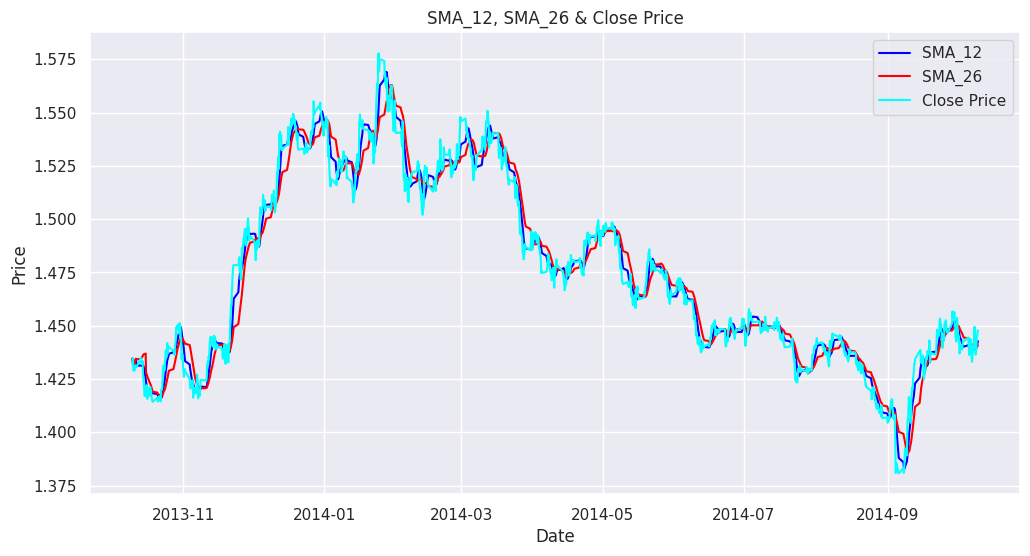

In [23]:

sns.set(style="dark")

plt.figure(figsize=(12, 6))

sns.lineplot(x='Gmt time', y='SMA12', data=df, label='SMA_12', color='blue')
sns.lineplot(x='Gmt time', y='SMA26', data=df, label='SMA_26', color='red')

sns.lineplot(x='Gmt time', y='Close', data=df, label='Close Price', color='cyan')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SMA_12, SMA_26 & Close Price')

plt.legend()
plt.grid()
plt.show()


#**Data Visualization with SMA12 vs EMA 12 vs Close**:

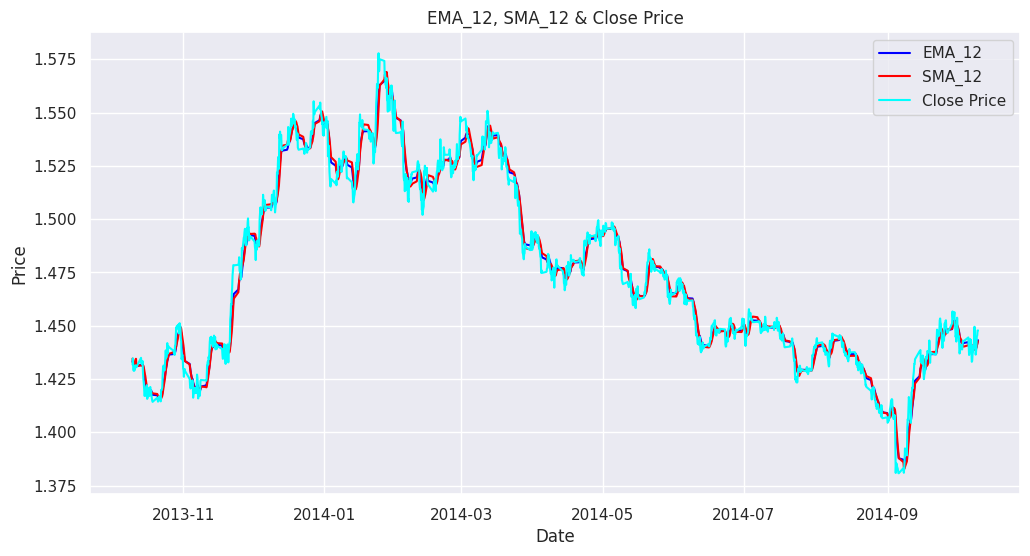

In [24]:

sns.set(style="dark")

plt.figure(figsize=(12, 6))

sns.lineplot(x='Gmt time', y='EMA12', data=df, label='EMA_12', color='blue')
sns.lineplot(x='Gmt time', y='SMA12', data=df, label='SMA_12', color='red')

sns.lineplot(x='Gmt time', y='Close', data=df, label='Close Price', color='cyan')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('EMA_12, SMA_12 & Close Price')

plt.legend()
plt.grid()
plt.show()


#**Data Visualization with SMA26 vs EMA26 vs Close**

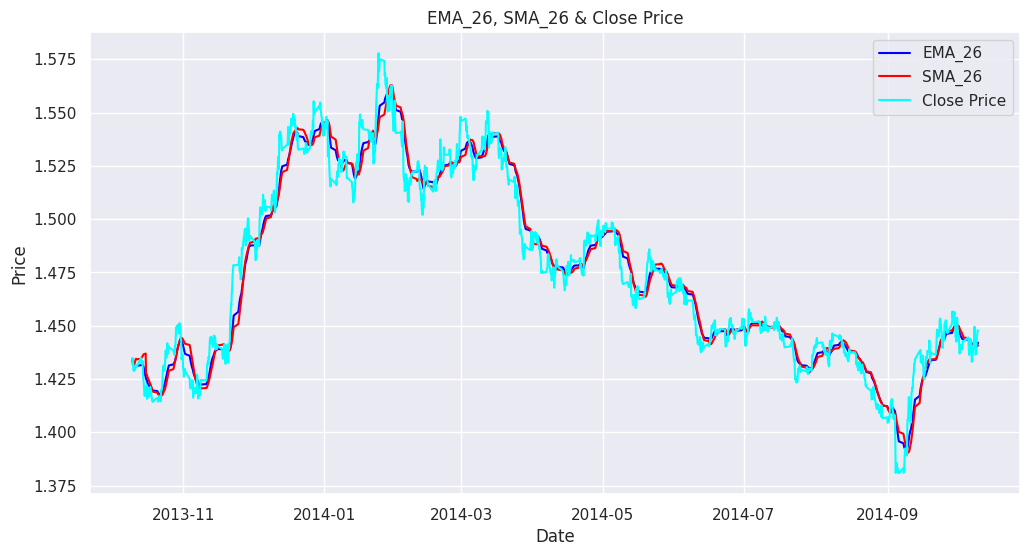

In [25]:
sns.set(style="dark")

plt.figure(figsize=(12, 6))

sns.lineplot(x='Gmt time', y='EMA26', data=df, label='EMA_26', color='blue')
sns.lineplot(x='Gmt time', y='SMA26', data=df, label='SMA_26', color='red')

sns.lineplot(x='Gmt time', y='Close', data=df, label='Close Price', color='cyan')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('EMA_26, SMA_26 & Close Price')

plt.legend()
plt.grid()
plt.show()


----
#**Question 3:**
 *a. Calculate MACD between EMA 26 and EMA 12.*

 *b. Plot line chart showing EMA 26 and EMA 12 and MACD*

 ----

In [26]:
# Approach: Make another column in dataframe ith values of MACD -> EMA26- EMA12

In [27]:
# Reset the column first
df = df.reset_index(drop=True)

In [28]:
# df.loc[0, 'MACD'] = df.loc[0, 'EMA26'] - df.loc[0, 'EMA12']

In [29]:
df['MACD'] = df['EMA26'] - df['EMA12']

In [30]:
df

,Gmt time,Volume,Open,High,Low,Close,EMA12,EMA26,SMA12,SMA26,MACD
0,2013-10-10 04:00:00,21117.4298,1.434590,1.436930,1.431630,1.431785,1.433068,1.433131,1.434585,1.434585,0.000063
1,2013-10-10 08:00:00,23338.8906,1.431805,1.435245,1.431505,1.434675,1.433695,1.433686,1.432653,1.432653,-0.000010
2,2013-10-10 12:00:00,36718.4101,1.434680,1.435950,1.428660,1.429970,1.432519,1.432647,1.432307,1.432307,0.000128
3,2013-10-10 16:00:00,17603.4700,1.429975,1.431300,1.428675,1.428905,1.431537,1.431779,1.432362,1.432362,0.000242
4,2013-10-10 20:00:00,15638.9304,1.428905,1.433625,1.428615,1.430595,1.431308,1.431542,1.431652,1.431652,0.000234
...,...,...,...,...,...,...,...,...,...,...,...
1605,2014-10-09 08:00:00,30950.5097,1.437830,1.440445,1.436270,1.440345,1.439885,1.440442,1.439637,1.440103,0.000557
1606,2014-10-09 12:00:00,44280.2803,1.440355,1.446465,1.437725,1.444960,1.440666,1.440777,1.440590,1.440250,0.000111
1607,2014-10-09 16:00:00,27649.6998,1.444995,1.447095,1.443415,1.445425,1.441398,1.441121,1.441313,1.440345,-0.000277
1608,2014-10-09 20:00:00,12899.9899,1.445420,1.448810,1.444330,1.447760,1.442377,1.441613,1.442150,1.440544,-0.000764


#**Data Visualization with EMA 26 vs EMA 12 vs MACD**:

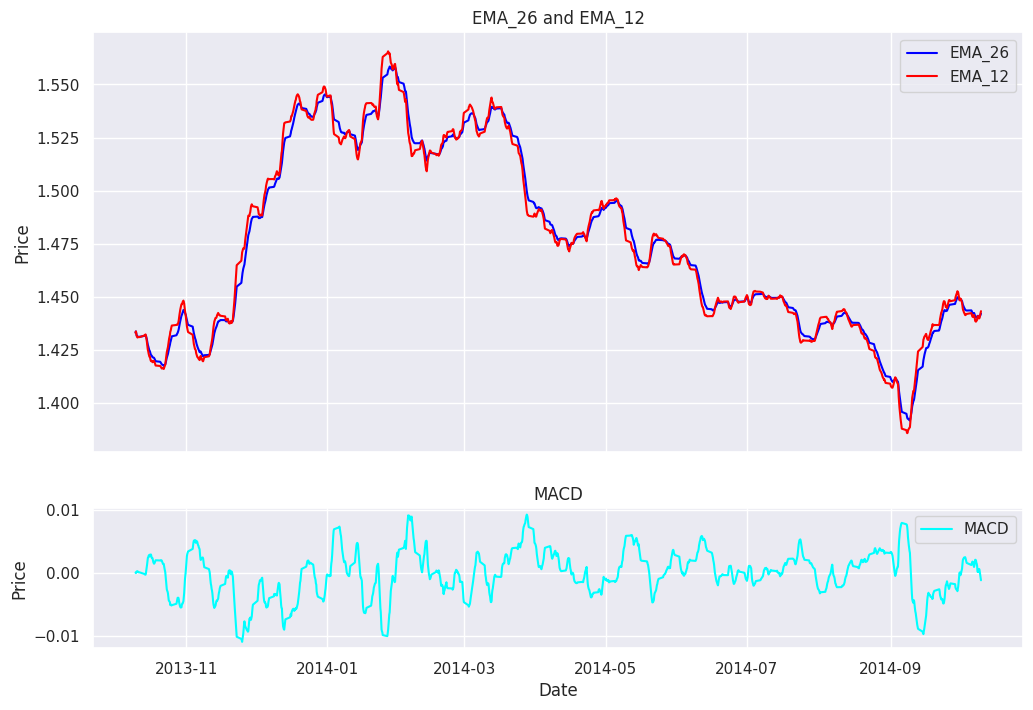

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw = {'height_ratios': [3,1]})

# Plot EMA_26 and EMA_12 on the first subplot (ax1)
sns.lineplot(x='Gmt time', y='EMA26', data=df, label='EMA_26', color='blue', ax=ax1)
sns.lineplot(x='Gmt time', y='EMA12', data=df, label='EMA_12', color='red', ax=ax1)
ax1.set_ylabel('Price')
ax1.set_title('EMA_26 and EMA_12')

ax1.legend()
ax1.grid()


# Plot MACD on the second subplot (ax2)
sns.lineplot(x='Gmt time', y='MACD', data=df, label='MACD', color='cyan', ax=ax2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Price')
ax2.set_title('MACD')

ax2.legend()
ax2.grid()

plt.show()


----
#**Calculate**

*   RSI
*   Bollinger Bands
*   ADX

----

#**Relative Strength Index (RSI) Indicator**

In [32]:
pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=2cdc719f015b9722b3a0734b8eac091790fb3854676f864f1d1cba41820301ba
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [33]:
import pandas_ta as ta

In [34]:
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [35]:
help(ta.rsi)

Help on function rsi in module pandas_ta.momentum.rsi:

rsi(close, length=None, scalar=None, talib=None, drift=None, offset=None, **kwargs)
    Relative Strength Index (RSI)
    
    The Relative Strength Index is popular momentum oscillator used to measure the
    velocity as well as the magnitude of directional price movements.
    
    Sources:
        https://www.tradingview.com/wiki/Relative_Strength_Index_(RSI)
    
    Calculation:
        Default Inputs:
            length=14, scalar=100, drift=1
        ABS = Absolute Value
        RMA = Rolling Moving Average
    
        diff = close.diff(drift)
        positive = diff if diff > 0 else 0
        negative = diff if diff < 0 else 0
    
        pos_avg = RMA(positive, length)
        neg_avg = ABS(RMA(negative, length))
    
        RSI = scalar * pos_avg / (pos_avg + neg_avg)
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): It's period. Default: 14
        scalar (float): How much to magnify.

In [36]:
df_new = df[['Gmt time','Open', 'High','Low', 'Close']]
df_rsi = df_new
df_rsi

,Gmt time,Open,High,Low,Close
0,2013-10-10 04:00:00,1.434590,1.436930,1.431630,1.431785
1,2013-10-10 08:00:00,1.431805,1.435245,1.431505,1.434675
2,2013-10-10 12:00:00,1.434680,1.435950,1.428660,1.429970
3,2013-10-10 16:00:00,1.429975,1.431300,1.428675,1.428905
4,2013-10-10 20:00:00,1.428905,1.433625,1.428615,1.430595
...,...,...,...,...,...
1605,2014-10-09 08:00:00,1.437830,1.440445,1.436270,1.440345
1606,2014-10-09 12:00:00,1.440355,1.446465,1.437725,1.444960
1607,2014-10-09 16:00:00,1.444995,1.447095,1.443415,1.445425
1608,2014-10-09 20:00:00,1.445420,1.448810,1.444330,1.447760


In [37]:
df_rsi['RSI_12'] = ta.rsi(df_rsi['Close'], timeperiod = 12)
df_rsi['RSI_26'] = ta.rsi(df_rsi['Close'], timeperiod = 26)

<ipython-input-37-8039cfeb45ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rsi['RSI_12'] = ta.rsi(df_rsi['Close'], timeperiod = 12)
<ipython-input-37-8039cfeb45ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rsi['RSI_26'] = ta.rsi(df_rsi['Close'], timeperiod = 26)


In [38]:
df_rsi

,Gmt time,Open,High,Low,Close,RSI_12,RSI_26
0,2013-10-10 04:00:00,1.434590,1.436930,1.431630,1.431785,NaN,NaN
1,2013-10-10 08:00:00,1.431805,1.435245,1.431505,1.434675,NaN,NaN
2,2013-10-10 12:00:00,1.434680,1.435950,1.428660,1.429970,NaN,NaN
3,2013-10-10 16:00:00,1.429975,1.431300,1.428675,1.428905,NaN,NaN
4,2013-10-10 20:00:00,1.428905,1.433625,1.428615,1.430595,NaN,NaN
...,...,...,...,...,...,...,...
1605,2014-10-09 08:00:00,1.437830,1.440445,1.436270,1.440345,49.806962,49.806962
1606,2014-10-09 12:00:00,1.440355,1.446465,1.437725,1.444960,54.989048,54.989048
1607,2014-10-09 16:00:00,1.444995,1.447095,1.443415,1.445425,55.487710,55.487710
1608,2014-10-09 20:00:00,1.445420,1.448810,1.444330,1.447760,58.003752,58.003752


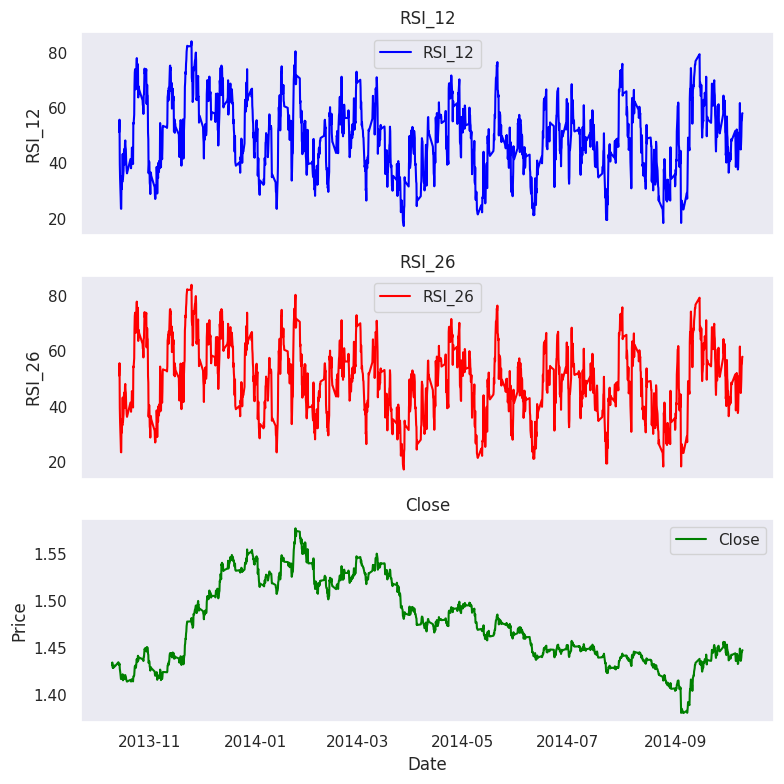

In [39]:
# Create subplots using Seaborn and Matplotlib
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8, 8), sharex=True)

# Plot RSI_12 on the first subplot
ax1.set_ylabel('RSI_12')
sns.lineplot(x='Gmt time', y = 'RSI_12', ax=ax1, data = df_rsi, label='RSI_12', color='blue')
ax1.set_title('RSI_12')

# Plot RSI_26 on the second subplot
ax2.set_ylabel('RSI_26')
sns.lineplot(x='Gmt time', y = 'RSI_26', ax=ax2, data = df_rsi, label='RSI_26', color='red')
ax2.set_title('RSI_26')

# Plot Close on the third subplot
ax3.set_xlabel('Date')
ax3.set_ylabel('Price')
sns.lineplot(x='Gmt time', y = 'Close', ax=ax3, data = df_rsi, label='Close', color='green')
ax3.set_title('Close')

plt.tight_layout()
plt.show()


#**ADX**

In [40]:
help(ta.adx)

Help on function adx in module pandas_ta.trend.adx:

adx(high, low, close, length=None, lensig=None, scalar=None, mamode=None, drift=None, offset=None, **kwargs)
    Average Directional Movement (ADX)
    
    Average Directional Movement is meant to quantify trend strength by measuring
    the amount of movement in a single direction.
    
    Sources:
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/average-directional-movement-adx/
        TA Lib Correlation: >99%
    
    Calculation:
        DMI ADX TREND 2.0 by @TraderR0BERT, NETWORTHIE.COM
            //Created by @TraderR0BERT, NETWORTHIE.COM, last updated 01/26/2016
            //DMI Indicator
            //Resolution input option for higher/lower time frames
            study(title="DMI ADX TREND 2.0", shorttitle="ADX TREND 2.0")
    
            adxlen = input(14, title="ADX Smoothing")
            dilen = input(14, title="DI Length")
            thold = input(20, title="Threshold")
  

In [41]:
df_adx = df_new

In [42]:
df_adx

,Gmt time,Open,High,Low,Close,RSI_12,RSI_26
0,2013-10-10 04:00:00,1.434590,1.436930,1.431630,1.431785,NaN,NaN
1,2013-10-10 08:00:00,1.431805,1.435245,1.431505,1.434675,NaN,NaN
2,2013-10-10 12:00:00,1.434680,1.435950,1.428660,1.429970,NaN,NaN
3,2013-10-10 16:00:00,1.429975,1.431300,1.428675,1.428905,NaN,NaN
4,2013-10-10 20:00:00,1.428905,1.433625,1.428615,1.430595,NaN,NaN
...,...,...,...,...,...,...,...
1605,2014-10-09 08:00:00,1.437830,1.440445,1.436270,1.440345,49.806962,49.806962
1606,2014-10-09 12:00:00,1.440355,1.446465,1.437725,1.444960,54.989048,54.989048
1607,2014-10-09 16:00:00,1.444995,1.447095,1.443415,1.445425,55.487710,55.487710
1608,2014-10-09 20:00:00,1.445420,1.448810,1.444330,1.447760,58.003752,58.003752


In [43]:
adx12 = ta.adx(df_adx['High'], df_adx['Low'], df_adx['Close'], length=12)
df_adx = df_adx.join(adx12)

adx26 = ta.adx(df_adx['High'], df_adx['Low'], df_adx['Close'], length = 26)
df_adx = df_adx.join(adx26)

In [44]:
df_adxfinal = df_adx[['Gmt time','Close','ADX_12','ADX_26']]

In [45]:
df_adxfinal

,Gmt time,Close,ADX_12,ADX_26
0,2013-10-10 04:00:00,1.431785,NaN,NaN
1,2013-10-10 08:00:00,1.434675,NaN,NaN
2,2013-10-10 12:00:00,1.429970,NaN,NaN
3,2013-10-10 16:00:00,1.428905,NaN,NaN
4,2013-10-10 20:00:00,1.430595,NaN,NaN
...,...,...,...,...
1605,2014-10-09 08:00:00,1.440345,23.372773,10.870867
1606,2014-10-09 12:00:00,1.444960,26.302400,11.780080
1607,2014-10-09 16:00:00,1.445425,29.064744,12.681032
1608,2014-10-09 20:00:00,1.447760,31.806222,13.619964


#**Data Visualization: ADX12, ADX26**

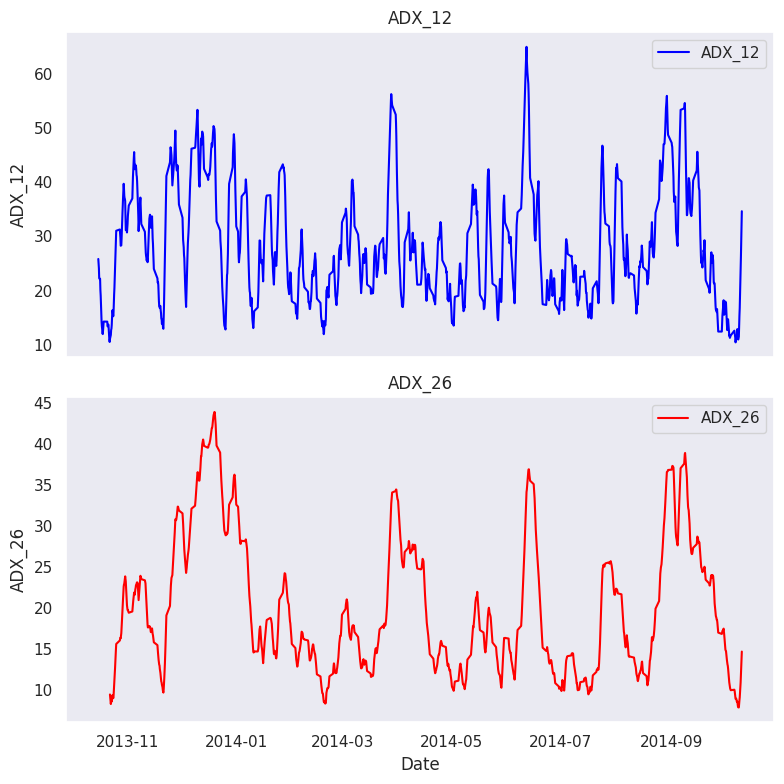

In [46]:
# Create subplots using Seaborn and Matplotlib
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 8), sharex=True)

ax1.set_ylabel('ADX_12')
sns.lineplot(x='Gmt time', y = 'ADX_12', ax=ax1, data = df_adxfinal, label='ADX_12', color='blue')
ax1.set_title('ADX_12')

ax2.set_ylabel('ADX_26')
sns.lineplot(x='Gmt time', y = 'ADX_26', ax=ax2, data = df_adxfinal, label='ADX_26', color='red')
ax2.set_title('ADX_26')

ax2.set_xlabel('Date')

plt.tight_layout()
plt.show()


#**Bollinger Bands**

In [47]:
help(ta.bbands)

Help on function bbands in module pandas_ta.volatility.bbands:

bbands(close, length=None, std=None, ddof=0, mamode=None, talib=None, offset=None, **kwargs)
    Bollinger Bands (BBANDS)
    
    A popular volatility indicator by John Bollinger.
    
    Sources:
        https://www.tradingview.com/wiki/Bollinger_Bands_(BB)
    
    Calculation:
        Default Inputs:
            length=5, std=2, mamode="sma", ddof=0
        EMA = Exponential Moving Average
        SMA = Simple Moving Average
        STDEV = Standard Deviation
        stdev = STDEV(close, length, ddof)
        if "ema":
            MID = EMA(close, length)
        else:
            MID = SMA(close, length)
    
        LOWER = MID - std * stdev
        UPPER = MID + std * stdev
    
        BANDWIDTH = 100 * (UPPER - LOWER) / MID
        PERCENT = (close - LOWER) / (UPPER - LOWER)
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): The short period. Default: 5
        std (int): The long 

In [48]:
df_bb = df[['Gmt time','Close']]

In [49]:
df_bb.head(5)

,Gmt time,Close
0,2013-10-10 04:00:00,1.431785
1,2013-10-10 08:00:00,1.434675
2,2013-10-10 12:00:00,1.429970
3,2013-10-10 16:00:00,1.428905
4,2013-10-10 20:00:00,1.430595


In [50]:
bbands_12 = ta.bbands(df_bb['Close'], length = 12)
bbands_26 = ta.bbands(df_bb['Close'], length = 26)

In [51]:
df_bb = df_bb.join(bbands_12)
df_bb = df_bb.join(bbands_26)

In [52]:
df_bb.columns

Index(['Gmt time', 'Close', 'BBL_12_2.0', 'BBM_12_2.0', 'BBU_12_2.0',
       'BBB_12_2.0', 'BBP_12_2.0', 'BBL_26_2.0', 'BBM_26_2.0', 'BBU_26_2.0',
       'BBB_26_2.0', 'BBP_26_2.0'],
      dtype='object')

In [53]:
df_bb = df_bb.drop(['BBB_12_2.0','BBP_12_2.0','BBB_26_2.0','BBP_26_2.0'], axis = 1)

In [54]:
new_column_names_12 = {'BBL_12_2.0': 'lower_12', 'BBM_12_2.0': 'mid_12', 'BBU_12_2.0': 'upper_12'}
new_column_names_26 = {'BBL_26_2.0': 'lower_26', 'BBM_26_2.0': 'mid_26', 'BBU_26_2.0': 'upper_26'}

In [55]:
df_bb.rename(columns=new_column_names_12, inplace=True)
df_bb.rename(columns=new_column_names_26, inplace=True)

#**Data Visualization for Bollinger bands**

Plot1 : Comparison of Close vs Upper12 vs Mid12 vs Low12


Plot2 : Comparison of Close vs Upper26 vs Mid26 vs Low12

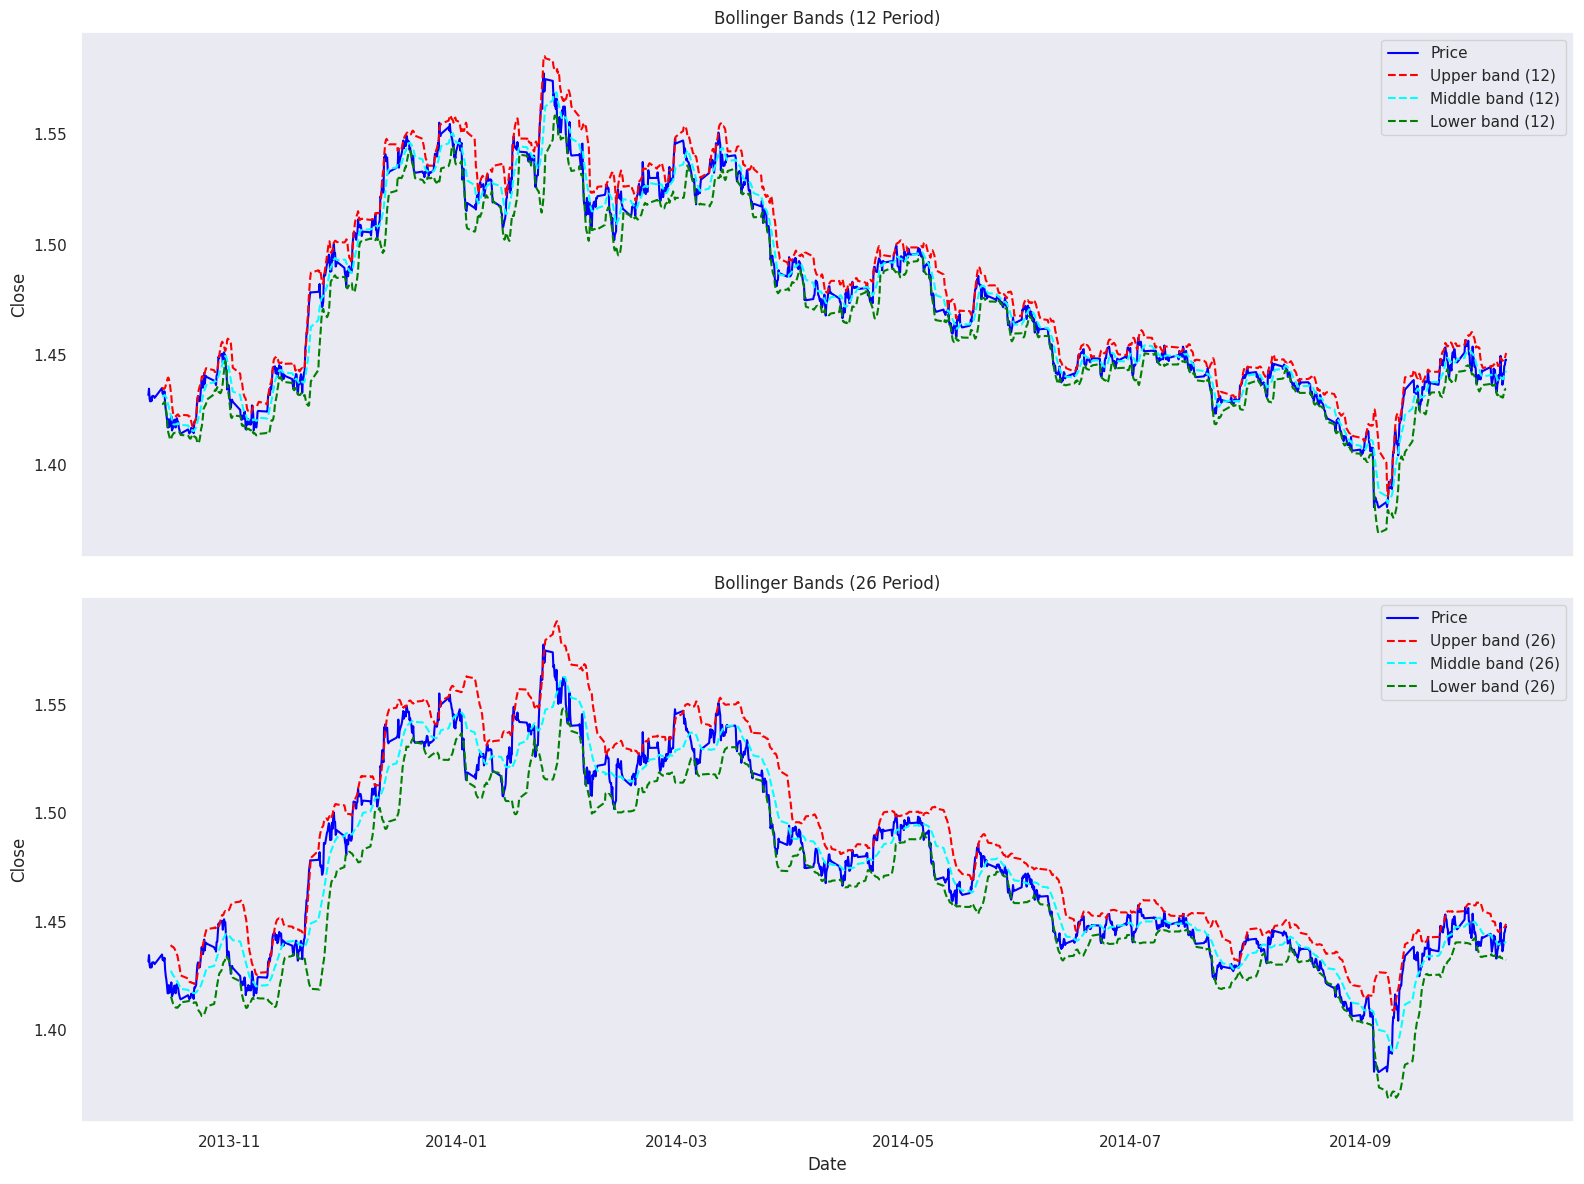

In [56]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(16, 12), sharex=True)

sns.set(style="darkgrid")

sns.lineplot(data=df_bb, x='Gmt time', y='Close', ax=ax1, label='Price', color='blue')
sns.lineplot(data=df_bb, x='Gmt time', y='upper_12', ax=ax1, label='Upper band (12)', color='red', linestyle='--')
sns.lineplot(data=df_bb, x='Gmt time', y='mid_12', ax=ax1, label='Middle band (12)', color='cyan', linestyle='--')
sns.lineplot(data=df_bb, x='Gmt time', y='lower_12', ax=ax1, label='Lower band (12)', color='green', linestyle='--')
ax1.set_title('Bollinger Bands (12 Period)')
ax1.legend()

sns.lineplot(data=df_bb, x='Gmt time', y='Close', ax=ax2, label='Price', color='blue')
sns.lineplot(data=df_bb, x='Gmt time', y='upper_26', ax=ax2, label='Upper band (26)', color='red', linestyle='--')
sns.lineplot(data=df_bb, x='Gmt time', y='mid_26', ax=ax2, label='Middle band (26)', color='cyan', linestyle='--')
sns.lineplot(data=df_bb, x='Gmt time', y='lower_26', ax=ax2, label='Lower band (26)', color='green', linestyle='--')
ax2.set_title('Bollinger Bands (26 Period)')
ax2.legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()


#**Data Visualization: Close vs High vs Low**

In [57]:
df.head(5)

,Gmt time,Volume,Open,High,Low,Close,EMA12,EMA26,SMA12,SMA26,MACD
0,2013-10-10 04:00:00,21117.4298,1.434590,1.436930,1.431630,1.431785,1.433068,1.433131,1.434585,1.434585,0.000063
1,2013-10-10 08:00:00,23338.8906,1.431805,1.435245,1.431505,1.434675,1.433695,1.433686,1.432653,1.432653,-0.000010
2,2013-10-10 12:00:00,36718.4101,1.434680,1.435950,1.428660,1.429970,1.432519,1.432647,1.432307,1.432307,0.000128
3,2013-10-10 16:00:00,17603.4700,1.429975,1.431300,1.428675,1.428905,1.431537,1.431779,1.432362,1.432362,0.000242
4,2013-10-10 20:00:00,15638.9304,1.428905,1.433625,1.428615,1.430595,1.431308,1.431542,1.431652,1.431652,0.000234


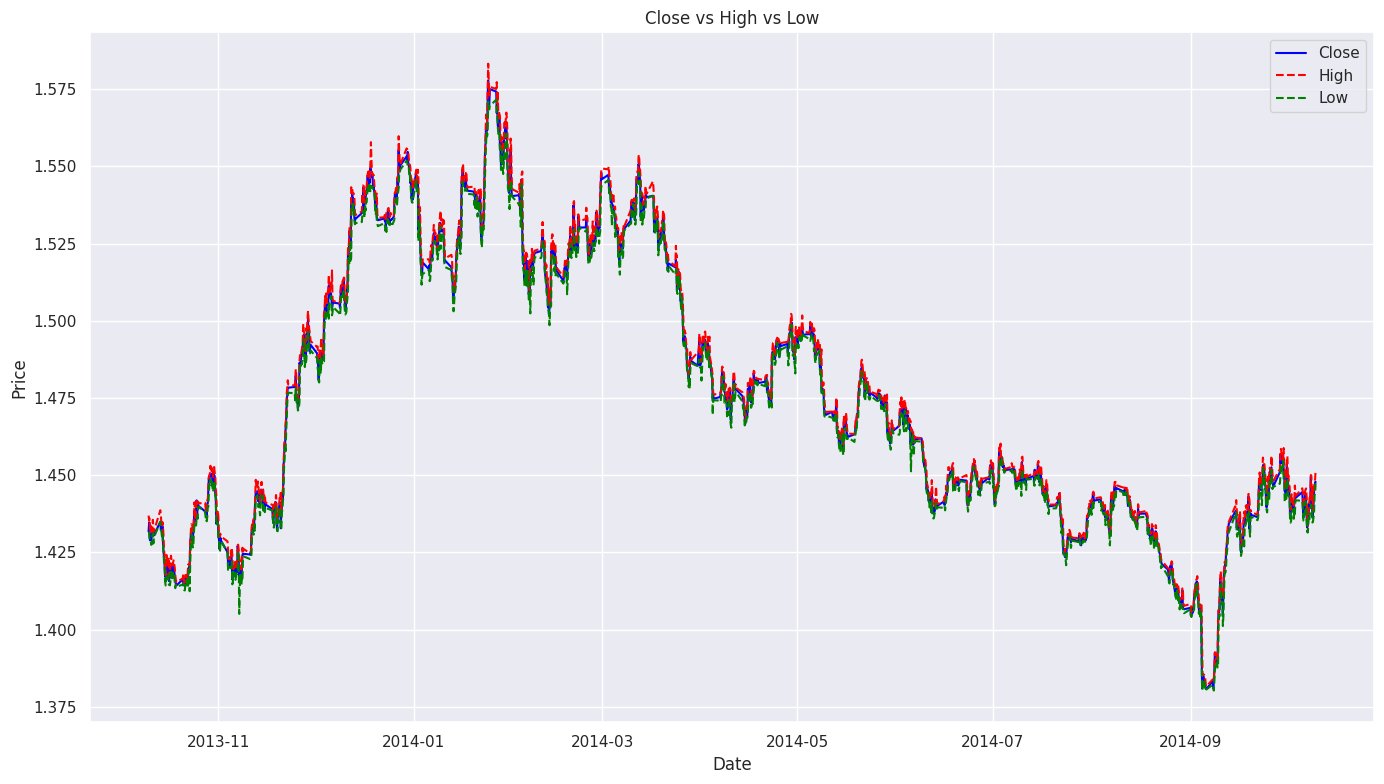

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.set(style="darkgrid")

sns.lineplot(data=df, x='Gmt time', y='Close', label='Close', color='blue')
sns.lineplot(data=df, x='Gmt time', y='High', label='High', color='red', linestyle='--')
sns.lineplot(data=df, x='Gmt time', y='Low', label='Low', color='green', linestyle='--')

plt.title('Close vs High vs Low')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

---
#**Subplot with Indicators:**

1) SMA 12 vs close

2) SMA 26 vs close

3) EMA 12 vs close

4) EMA 26 vs close

5) MACD

6) RSI 12 vs close

7) RSI 26 vs close

8) Bollinger bands all three vs close

9) ADX

10) Close vs High vs Low

----

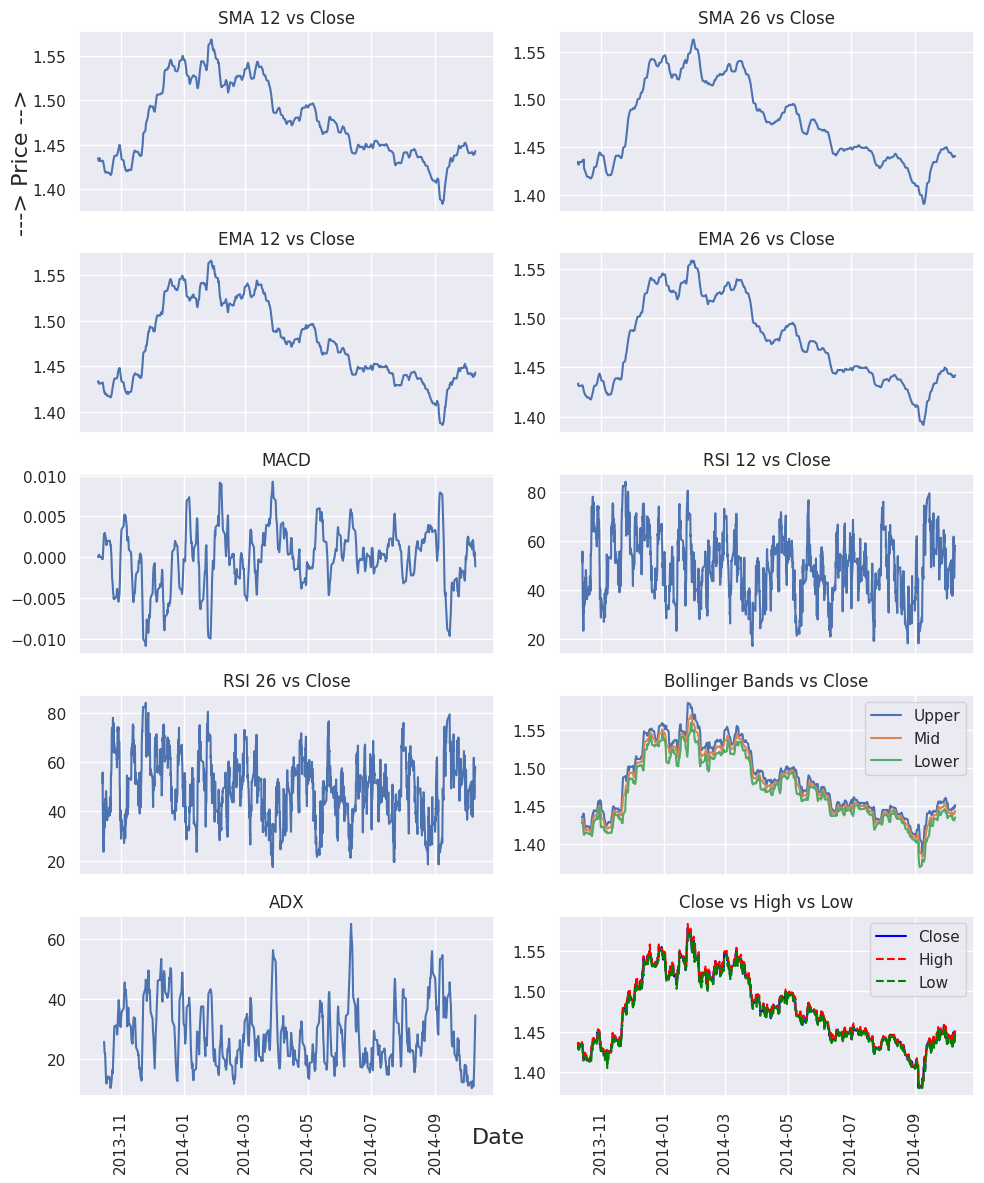

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5 x 2 Subplot Grid
fig, axes = plt.subplots(5, 2, figsize=(10, 12), sharex=True)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# 1. SMA 12 vs Close
sns.lineplot(data=df, x='Gmt time', y='SMA12', ax=axes[0, 0])
axes[0, 0].set_title('SMA 12 vs Close')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('')

# 2. SMA 26 vs Close
sns.lineplot(data=df, x='Gmt time', y='SMA26', ax=axes[0, 1])
axes[0, 1].set_title('SMA 26 vs Close')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')

# 3. EMA 12 vs Close
sns.lineplot(data=df, x='Gmt time', y='EMA12', ax=axes[1, 0])
axes[1, 0].set_title('EMA 12 vs Close')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('')

# 4. EMA 26 vs Close
sns.lineplot(data=df, x='Gmt time', y='EMA26', ax=axes[1, 1])
axes[1, 1].set_title('EMA 26 vs Close')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')

# 5. MACD
sns.lineplot(data=df, x='Gmt time', y='MACD', ax=axes[2, 0])
axes[2, 0].set_title('MACD')
axes[2, 0].set_xlabel('')
axes[2, 0].set_ylabel('')

# 6. RSI 12 vs Close
sns.lineplot(data=df_rsi, x='Gmt time', y='RSI_12', ax=axes[2, 1])
axes[2, 1].set_title('RSI 12 vs Close')
axes[2, 1].set_xlabel('')
axes[2, 1].set_ylabel('')

# 7. RSI 26 vs Close
sns.lineplot(data=df_rsi, x='Gmt time', y='RSI_26', ax=axes[3, 0])
axes[3, 0].set_title('RSI 26 vs Close')
axes[3, 0].set_xlabel('')
axes[3, 0].set_ylabel('')

# 8. Bollinger Bands vs Close
sns.lineplot(data=df_bb, x='Gmt time', y='upper_12', ax=axes[3, 1], label='Upper')
sns.lineplot(data=df_bb, x='Gmt time', y='mid_12', ax=axes[3, 1], label='Mid')
sns.lineplot(data=df_bb, x='Gmt time', y='lower_12', ax=axes[3, 1], label='Lower')
axes[3, 1].set_title('Bollinger Bands vs Close')
axes[3, 1].legend()
axes[3, 1].set_xlabel('')
axes[3, 1].set_ylabel('')

# 9. ADX
sns.lineplot(data=df_adx, x='Gmt time', y='ADX_12', ax=axes[4, 0])
axes[4, 0].set_title('ADX')
axes[4, 0].set_xlabel('')
axes[4, 0].set_ylabel('')
axes[4, 0].tick_params(axis='x', labelrotation=90)  # Rotate x-axis labels by 90 degrees


# 10. Close vs High vs Low
sns.lineplot(data=df, x='Gmt time', y='Close', label='Close', color='blue', ax=axes[4, 1])
sns.lineplot(data=df, x='Gmt time', y='High', label='High', color='red', linestyle='--', ax=axes[4, 1])
sns.lineplot(data=df, x='Gmt time', y='Low', label='Low', color='green', linestyle='--', ax=axes[4, 1])
axes[4, 1].set_title('Close vs High vs Low')
axes[4, 1].legend()
axes[4, 1].set_xlabel('')
axes[4, 1].set_ylabel('')
axes[4, 1].tick_params(axis='x', labelrotation=90)  # Rotate x-axis labels by 90 degrees

# Common y-axis label 'Price'
fig.text(0.02, 0.80, '---> Price -->', rotation='vertical', fontsize=16)
#fig.text(0.06, 0.5, 'Price', va='center', rotation='vertical', fontsize=16)


# Common x-axis label 'Date'
fig.text(0.48, 0.04, 'Date', fontsize=16)


plt.tight_layout()

# Display the subplots
plt.show()


----
#**Predict Close Price Using Linear Regression Model**
----

Dependent Variable: Close

Independent Variables:
1. Open
2. High
3. Low


In [60]:
df
df_reg = df[['Gmt time','Open','High','Low','Close']]

**Checking for Missing Values**

In [61]:
df_reg.isna().sum()

Gmt time    0
Open        0
High        0
Low         0
Close       0
dtype: int64

In [62]:
df['Gmt time'] = pd.to_datetime(df['Gmt time'], format ='%d.%m.%Y %H:%M:%S.%f')

In [63]:
# make the 'Gmt time' as index
df_reg.set_index('Gmt time', inplace = True)

In [64]:
df_reg.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [65]:
df_reg.head(20)

,Open,High,Low,Close
Gmt time,,,,
2013-10-10 04:00:00,1.434590,1.436930,1.431630,1.431785
2013-10-10 08:00:00,1.431805,1.435245,1.431505,1.434675
2013-10-10 12:00:00,1.434680,1.435950,1.428660,1.429970
2013-10-10 16:00:00,1.429975,1.431300,1.428675,1.428905
2013-10-10 20:00:00,1.428905,1.433625,1.428615,1.430595
2013-10-11 00:00:00,1.430610,1.431940,1.427445,1.429010
2013-10-11 04:00:00,1.428995,1.431660,1.427730,1.431230
2013-10-11 08:00:00,1.431270,1.433415,1.430495,1.431305
2013-10-11 12:00:00,1.431320,1.435560,1.431135,1.431440


In [66]:
df.index.dtype

dtype('int64')

No Missing Values

In [67]:
from sklearn import linear_model

In [68]:
reg = linear_model.LinearRegression()

In [69]:
reg.fit(df_reg.drop('Close' , axis = 'columns'), df_reg.Close)

LinearRegression()

In [70]:
reg.coef_

array([-0.58650643,  0.81764986,  0.76717272])

In [71]:
reg.intercept_

0.002356308910711258

In [72]:
reg.predict([[1.6,1.7,1.5]])        # 1.60470986

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.60470986])

In [73]:
y = (1.6 * (-0.58650643) + 1.7 * 0.81764986 + 1.5 * 0.76717272) + 0.002356308910711258
print(y)

1.604709862910711


The predicted close price for a stock data with

'Open Price' of *1.6*,

'High Price' of *1.7*,

'Low Price of *1.5* is

#**1.604709862910711**

----

#**Data Visualizaton: Actual Close Price vs Predicted Close Price**

----

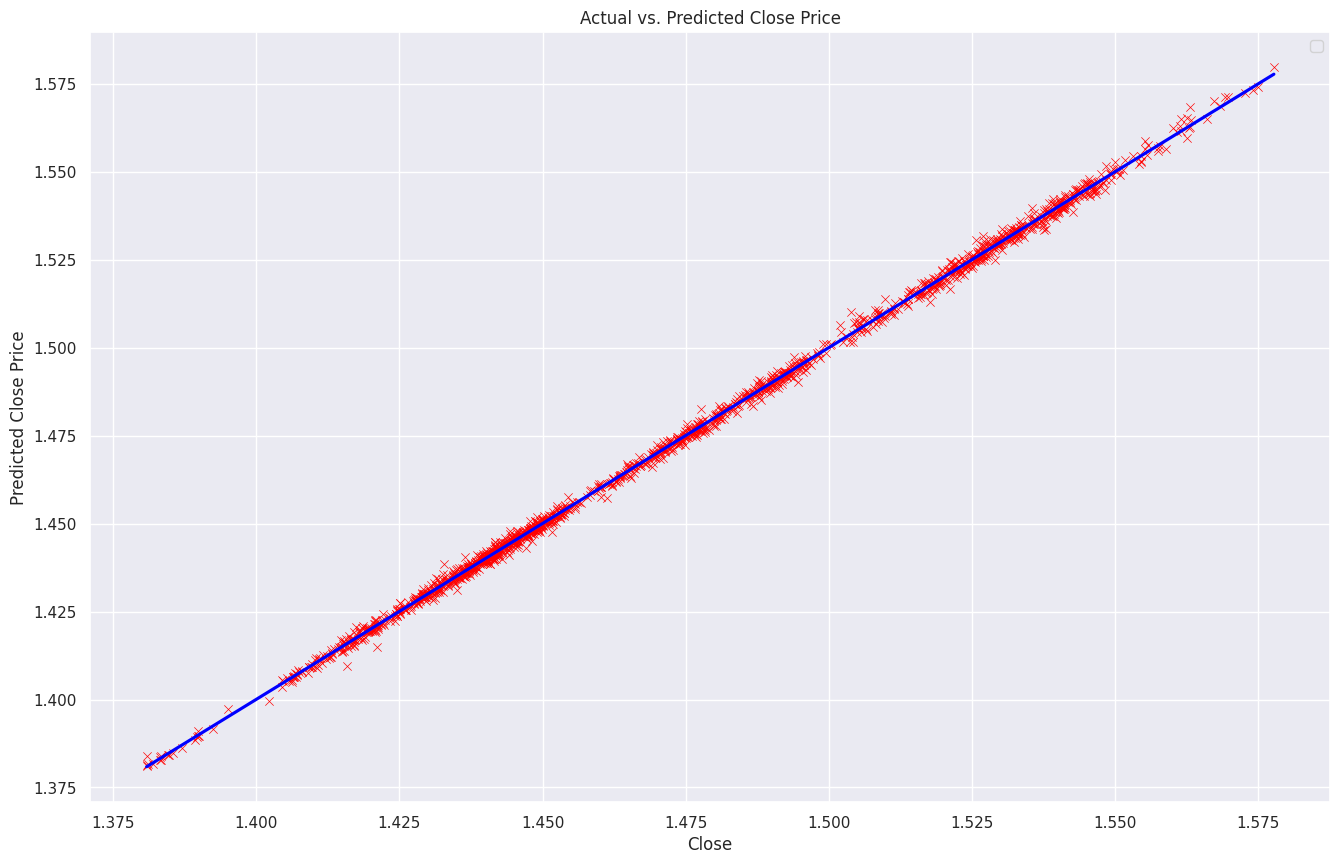

In [74]:

predicted_close = reg.predict(df[['Open', 'High', 'Low']])

plt.figure(figsize=(16, 10))
sns.scatterplot(x=df['Close'], y=predicted_close, color='red', marker = 'x')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs. Predicted Close Price')

# Perfect prediction
#plt.plot([df['Close'].min(), df['Close'].max()], [df['Close'].min(), df['Close'].max()], linestyle='--', color='blue')

sns.regplot(x=df['Close'], y=predicted_close, scatter=False, color='blue')


plt.legend()

plt.show()